In [1]:
###################################################
#      L08.1 latent factor model practice         #
###################################################

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# 파일에서의 구분자 : 탭 / 순서 : user item(movie) rating timestamp

train = pd.read_csv("ml-100k/ml-100k/ua.base",  sep="\t", names=['user', 'item', 'rating', 'timestamp'])
test = pd.read_csv("ml-100k/ml-100k/ua.test",  sep="\t", names=['user', 'item', 'rating', 'timestamp'])

In [13]:
items = torch.LongTensor(train['item'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])

items_test = torch.LongTensor(test['item'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])


tensor([   1,    2,    3,  ..., 1188, 1228, 1330])


In [5]:
print(items.shape)
print(users.shape)
print(ratings.shape)

# m*n 벡터가 있을 때, n을 다른 말로 rank 라고도 부름. rank 커지면 메모리 차지 많이 함.

torch.Size([90570])
torch.Size([90570])
torch.Size([90570])


In [6]:
rank = 10

numItems = items.max() + 1
numUsers = users.max() + 1

P = torch.randn(numItems, rank, requires_grad=True) # gradient 방법으로 update
Q = torch.randn(numUsers, rank, requires_grad=True)

In [7]:
mse = nn.MSELoss()
optimizer = torch.optim.Adam([P, Q], lr= 0.1)

X = []
Y = []
Y_test = []

for epoch in range(1001):
    h = torch.sum(P[items] * Q[users], dim=1)
    # h = (P[items] * Q[users]).sum(dim=1)
    cost = mse(h, ratings)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    with torch.no_grad():
        X.append(epoch)
        Y.append(cost.item())
        
        h_test = (P[items_test] * Q[users_test]).sum(dim=1)
        cost_test = mse(h_test, ratings_test)
        
        Y_test.append(cost_test.item())
        
        if epoch % 100 == 0:
            print("epoch: {}, cost: {:.6f}, cost_test: {}" .format(epoch, cost.item(), cost_test))
            

epoch: 0, cost: 23.657547, cost_test: 21.82521629333496
epoch: 100, cost: 0.562997, cost_test: 1.5194265842437744
epoch: 200, cost: 0.492439, cost_test: 1.8790864944458008
epoch: 300, cost: 0.468977, cost_test: 2.240058422088623
epoch: 400, cost: 0.458477, cost_test: 2.5998804569244385
epoch: 500, cost: 0.452507, cost_test: 2.9522037506103516
epoch: 600, cost: 0.448694, cost_test: 3.362626791000366
epoch: 700, cost: 0.446213, cost_test: 3.8632290363311768
epoch: 800, cost: 0.444462, cost_test: 4.392175674438477
epoch: 900, cost: 0.443163, cost_test: 4.8770294189453125
epoch: 1000, cost: 0.442141, cost_test: 5.323320388793945


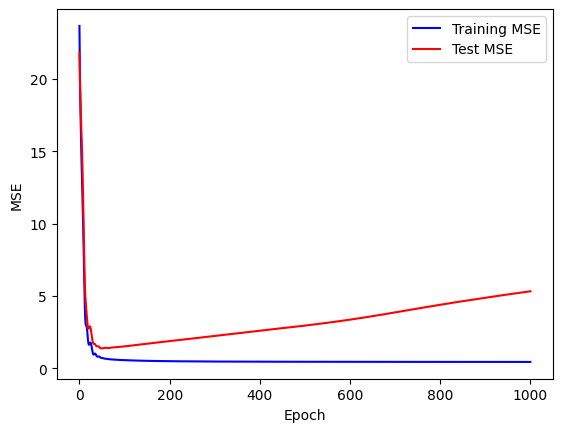

In [8]:
plt.ylabel("MSE")  
plt.xlabel("Epoch")  
plt.plot(X, Y, c="blue", label="Training MSE")  
plt.plot(X, Y_test, c="red", label="Test MSE")
plt.legend()  
plt.show()

## Regularization

In [9]:
rank = 10
lambda1 = 0.1 # 가중치
lambda2 = 0.1


numItems = items.max() + 1
numUsers = users.max() + 1

mean = ratings.mean()
#mean = (ratings.sum() / len(ratings)).item()

P = torch.randn(numItems, rank, requires_grad=True) # gradient 방법으로 update
Q = torch.randn(numUsers, rank, requires_grad=True)

epoch: 0, cost: 12.586684, cost_test : 12.15028190612793
epoch: 100, cost: 0.464074, cost_test : 1.1687027215957642
epoch: 200, cost: 0.459401, cost_test : 1.180284023284912
epoch: 300, cost: 0.458309, cost_test : 1.1857651472091675
epoch: 400, cost: 0.457718, cost_test : 1.1876745223999023
epoch: 500, cost: 0.457272, cost_test : 1.1887506246566772
epoch: 600, cost: 0.456871, cost_test : 1.1899909973144531
epoch: 700, cost: 0.456539, cost_test : 1.1922262907028198
epoch: 800, cost: 0.456270, cost_test : 1.1932846307754517
epoch: 900, cost: 0.456073, cost_test : 1.1929175853729248
epoch: 1000, cost: 0.455888, cost_test : 1.1929117441177368


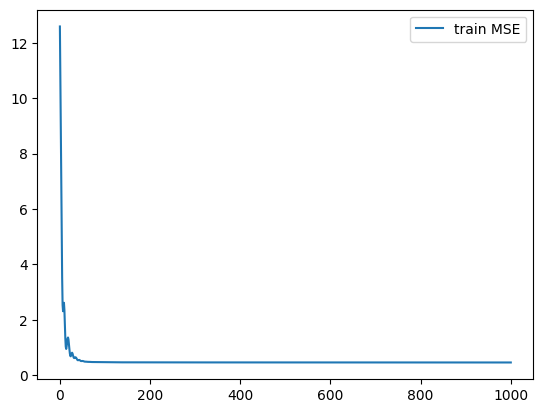

In [14]:
mse = nn.MSELoss()
optimizer = torch.optim.Adam([P, Q], lr= 0.1)

X = []
Y = []
Y_test = []

for epoch in range(1001):
    h = torch. sum(P[items] * Q[users], dim=1)     
    # h = (P[items] * Q[users]).sum(dim=1)
    cost = mse(h, ratings)
    cost_reg = cost + lambda1 * (P ** 2).mean() + lambda2 * (Q ** 2).mean()
    
    optimizer.zero_grad()
    #cost.backward()
    cost_reg.backward()
    optimizer.step()
    
    with torch.no_grad():
        X.append(epoch)
        Y.append(cost.item())
        
        
        
        h_test = (P[items_test] * Q[users_test]).sum(dim=1)
        cost_test = mse(h_test, ratings_test)
        
        Y_test.append(cost_test.item())
        
        if epoch % 100 == 0:
            print("epoch: {}, cost: {:.6f}, cost_test : {}" .format(epoch, cost.item(), cost_test))
            
plt.plot(X, Y, label="train MSE")
#plt.plot(X, Y_test, label="test MSE")
plt.legend() # 이름이 찍힘
plt.show()


# regularization 으로 overfitting이 조금 해결됐다. cost로 했을 때와, cost_reg로 했을 때 비교해보면 그래프가 올라가지 않음.

Bias 추가

In [11]:
rank = 10
lambda1 = 0.1 # 가중치
lambda2 = 0.1
lambda3 = 0.1
lambda4 = 0.1


numItems = items.max() + 1
numUsers = users.max() + 1

mean = ratings.mean()

P = torch.randn(numItems, rank, requires_grad=True) # gradient 방법으로 update
Q = torch.randn(numUsers, rank, requires_grad=True)
bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)

epoch: 0, cost: 13.143369, cost_test : 10.460397720336914
epoch: 100, cost: 0.500223, cost_test : 1.164635181427002
epoch: 200, cost: 0.458587, cost_test : 1.1912741661071777
epoch: 300, cost: 0.447115, cost_test : 1.1948742866516113
epoch: 400, cost: 0.442564, cost_test : 1.194921612739563
epoch: 500, cost: 0.440850, cost_test : 1.1921055316925049
epoch: 600, cost: 0.440072, cost_test : 1.191045880317688
epoch: 700, cost: 0.439393, cost_test : 1.196309208869934
epoch: 800, cost: 0.438895, cost_test : 1.2016254663467407
epoch: 900, cost: 0.438203, cost_test : 1.2108583450317383
epoch: 1000, cost: 0.437801, cost_test : 1.2183096408843994


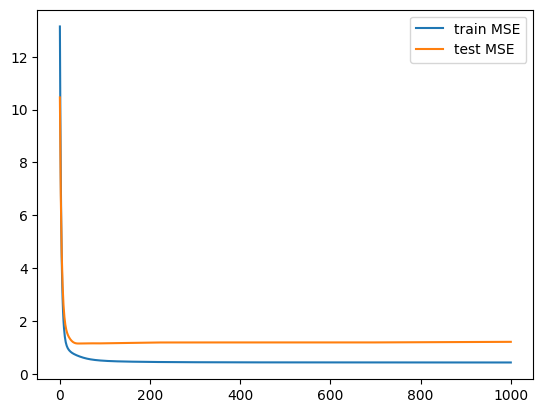

In [12]:
mse = nn.MSELoss()
optimizer = torch.optim.Adam([P, Q, bias_item, bias_user], lr= 0.1)

X = []
Y = []
Y_test = []

for epoch in range(1001):
    h = torch. sum(P[items] * Q[users], dim=1) + mean + bias_item[items] + bias_user[users]
    # h = (P[items] * Q[users]).sum(dim=1)
    cost = mse(h, ratings)
    cost_reg = cost + lambda1 * (P ** 2).mean() + lambda2 * (Q ** 2).mean() + lambda3 * (bias_item ** 2).mean() + lambda4 * (bias_user ** 2).mean() # regularization
    
    optimizer.zero_grad()
    #cost.backward()
    cost_reg.backward()
    optimizer.step()
    
    with torch.no_grad():
        X.append(epoch)
        Y.append(cost.item())
        
        
        
        h_test = (P[items_test] * Q[users_test]).sum(dim=1) + mean + bias_item[items_test] + bias_user[users_test]
        cost_test = mse(h_test, ratings_test)
        
        Y_test.append(cost_test.item())
        
        if epoch % 100 == 0:
            print("epoch: {}, cost: {:.6f}, cost_test : {}" .format(epoch, cost.item(), cost_test))
            
plt.plot(X, Y, label="train MSE")
plt.plot(X, Y_test, label="test MSE")
plt.legend() # 이름이 찍힘
plt.show()


# regularization 으로 overfitting이 조금 해결됐다. cost로 했을 때와, cost_reg로 했을 때 비교해보면 그래프가 올라가지 않음.